In [1]:
#pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

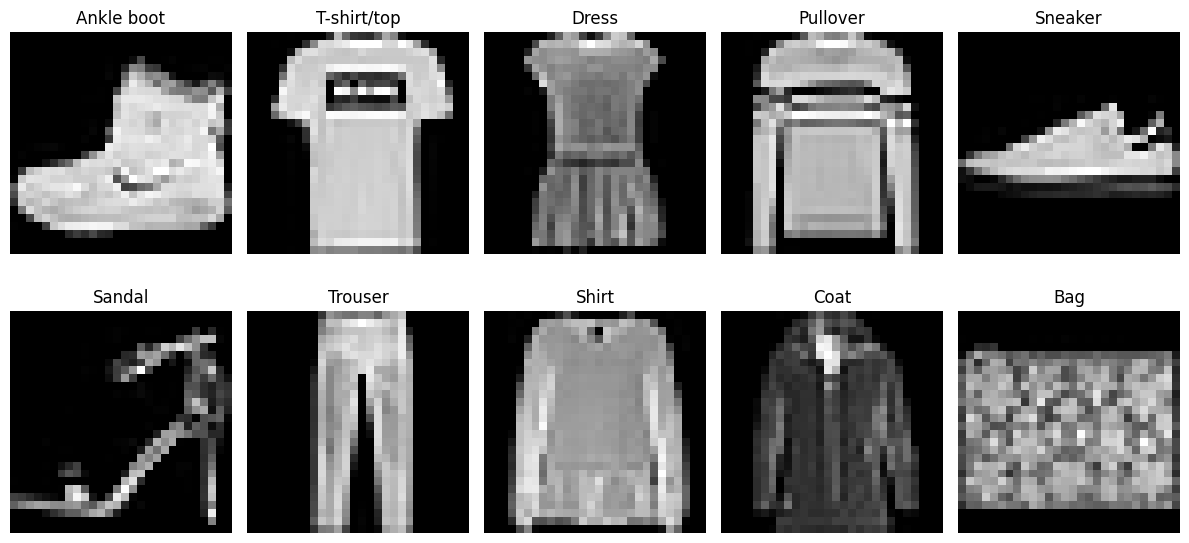

In [38]:
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load Fashion-MNIST dataset (only for visualization)
transform = transforms.ToTensor()
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Select one example per class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # Create a 2x5 grid for visualization
sample_per_class = {}

for img, label in dataset:
    if label not in sample_per_class:  # Store first image of each class
        sample_per_class[label] = img
    if len(sample_per_class) == 10:  # Stop when all 10 classes are covered
        break

# Plot the images
for idx, (label, img) in enumerate(sample_per_class.items()):
    ax = axes[idx // 5, idx % 5]  # Assign image to subplot grid
    ax.imshow(img.squeeze(), cmap='gray')  # Remove single channel dimension & display
    ax.set_title(class_names[label])  # Set class name as title
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


In [3]:
# Set up transformations for preprocessing the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalizes the tensor with mean and standard deviation
])

In [4]:
# Loading the training dataset from Fashion-MNIST
train_set = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
# Loading the testing dataset from Fashion-MNIST
test_set = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.29MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 150kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.78MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 18.9MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [9]:
# Creating a DataLoader for the training set with batching, shuffling, and other parameters
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
# Creating a DataLoader for the test set
test_loader = DataLoader(test_set, batch_size=128, shuffle=False)

# Example: Iterate over the train_loader to access batches of images and labels
for images, labels in train_loader:
    print(images.shape, labels.shape)  # Outputs the shape of images and labels in the batch
    break  # Exits the loop after the first batch

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [10]:
import torch
import torchvision.models as models
from torch import nn


**Load a Pre-trained Model**: We will load ResNet18 from PyTorch's model zoo.

**Modify the Model for Fashion-MNIST:** Since Fashion-MNIST has 10 classes, we need to adjust the final layer of the ResNet model to output 10 predictions.

In [11]:
# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Since Fashion-MNIST is grayscale, change the first layer to accept 1 channel (default is 3)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Adjusting the final layer to classify 10 types of fashion products
model.fc = nn.Linear(model.fc.in_features, 10)

# Check if CUDA is available and move the model to GPU if it is
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example: Print model structure (optional)
print(model)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Training Setup:**

In [12]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

# Loss function
criterion = CrossEntropyLoss()

# Optimizer (Using Adam here for demonstration)
optimizer = Adam(model.parameters(), lr=0.0005)

# Training loop (simplified for demonstration)
for epoch in range(10):  # Runs training for 10 epochs
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU if available
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the model
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.2844860851764679
Epoch 2, Loss: 0.34759899973869324
Epoch 3, Loss: 0.2507700026035309
Epoch 4, Loss: 0.21831220388412476
Epoch 5, Loss: 0.12672168016433716
Epoch 6, Loss: 0.18009036779403687
Epoch 7, Loss: 0.26488232612609863
Epoch 8, Loss: 0.16299837827682495
Epoch 9, Loss: 0.15526609122753143
Epoch 10, Loss: 0.149788036942482


**Evaluation Techniques:**

**Validation Split:** Creating a validation set from training data to monitor the model's performance on unseen data. This helps in detecting overfitting.

In [14]:
from torch.utils.data import random_split

# Assuming you have 60,000 images in train_set
train_size = int(0.8 * len(train_set))  # Calculate 80% of the dataset size for training
val_size = len(train_set) - train_size  # The remaining 20% will be used for validation
train_dataset, val_dataset = random_split(train_set, [train_size, val_size])
# random_split is used to partition the dataset into non-overlapping new datasets.
# train_dataset will have 80% of the data, and val_dataset will have the remaining 20%


**Model Evaluation**:

During training, evaluate the model on the validation set at the end of each epoch to track improvements and decide when to stop training.

In [20]:
def evaluate_model(model, val_loader):
    model.eval()  # Switch the model to evaluation mode (this disables dropout and batch normalization)
    total, correct = 0, 0  # Initialize counters for total and correctly predicted samples
    with torch.no_grad():  # Temporarily set all the requires_grad flag to false
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Move images and labels to the current device (CPU/GPU)
            outputs = model(images)  # Compute the model output
            _, predicted = torch.max(outputs.data, 1)  # Find the class with the highest score
            total += labels.size(0)  # Increment the total count by the number of labels in this batch
            correct += (predicted == labels).sum().item()  # Increment the correct count
    return 100 * correct / total  # Calculate and return the accuracy percentage


**Learning Rate Scheduler**

In [21]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.1, verbose=True)
# ReduceLROnPlateau adjusts the learning rate when a metric has stopped improving
# 'min' means it will reduce when the quantity monitored has stopped decreasing
# patience=2 means wait for 2 epochs with no improvement
# factor=0.1 means multiply the learning rate by 0.1 (reduce it)
# verbose=True means print out messages when the learning rate is reduced


**Regularization in Optimizer**

In [18]:
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Setup the optimizer
# Adam is an adaptive learning rate optimization algorithm
# lr=0.001 sets the initial learning rate
# weight_decay=1e-5 adds L2 penalty (regularization) to the loss to prevent overfitting


**Implementing the Training and Validation Loop**

In [25]:

from torch.utils.data import DataLoader
for epoch in range(10):  # Number of epochs
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()  # Clear gradients for this training step
        outputs = model(images)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)
        running_loss += loss.item() * images.size(0)  # Update running training loss

    # Validation phase
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
    val_accuracy = evaluate_model(model, val_loader)  # Evaluate the model on the validation set

    # Print statistics
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader.dataset)}, Validation Accuracy: {val_accuracy}%")

    # Optionally, add learning rate scheduler step here
    scheduler.step(val_accuracy)


Epoch 1, Loss: 0.00630534707106029, Validation Accuracy: 99.925%
Epoch 2, Loss: 0.005427690296216557, Validation Accuracy: 99.91666666666667%
Epoch 3, Loss: 0.0052649605004582555, Validation Accuracy: 99.91666666666667%
Epoch 4, Loss: 0.00488992392293488, Validation Accuracy: 99.94166666666666%
Epoch 5, Loss: 0.005271384877245873, Validation Accuracy: 99.925%
Epoch 6, Loss: 0.005148284138832241, Validation Accuracy: 99.93333333333334%
Epoch 7, Loss: 0.004715177124117812, Validation Accuracy: 99.91666666666667%
Epoch 8, Loss: 0.005173827144565681, Validation Accuracy: 99.94166666666666%
Epoch 9, Loss: 0.0052098257006146015, Validation Accuracy: 99.93333333333334%
Epoch 10, Loss: 0.005192399433472504, Validation Accuracy: 99.925%


In [34]:
import matplotlib.pyplot as plt  # Import matplotlib for image visualization
import torchvision  # Import torchvision to handle image transformations
import torch  # Import torch to handle tensor operations

def visualize_model_predictions(model, val_loader, device, num_images=6):
    """
    Function to visualize the model's predictions on the validation dataset.

    Parameters:
    model: Trained PyTorch model.
    val_loader: DataLoader for validation dataset.
    device: CPU or GPU where the model is loaded.
    num_images: Number of images to display.
    """

    model.eval()  # Set the model to evaluation mode (disables dropout & batch normalization)
    images_so_far = 0  # Counter to keep track of displayed images
    fig = plt.figure(figsize=(12, 12))  # Create a figure for plotting

    with torch.no_grad():  # Disable gradient calculation for faster inference
        for images, labels in val_loader:  # Iterate over validation dataset
            images, labels = images.to(device), labels.to(device)  # Move images and labels to the specified device
            outputs = model(images)  # Get model predictions
            _, preds = torch.max(outputs, 1)  # Get the predicted class (index with highest probability)

            for j in range(images.size(0)):  # Iterate over batch images
                images_so_far += 1  # Increment image counter

                # Create subplot dynamically
                ax = plt.subplot((num_images + 1) // 2, 2, images_so_far)
                ax.axis('off')  # Remove axis for better visualization
                ax.set_title(f'Predicted: {preds[j].item()} / Actual: {labels[j].item()}')  # Set title with predicted and actual labels

                # Convert tensor image to a format that can be displayed
                img = images[j].cpu().numpy().squeeze()  # Convert tensor to numpy array
                plt.imshow(img, cmap='gray') # Display image in grayscale

                if images_so_far == num_images:  # Stop after displaying required number of images
                    plt.show()  # Show the plot
                    return  # Exit function


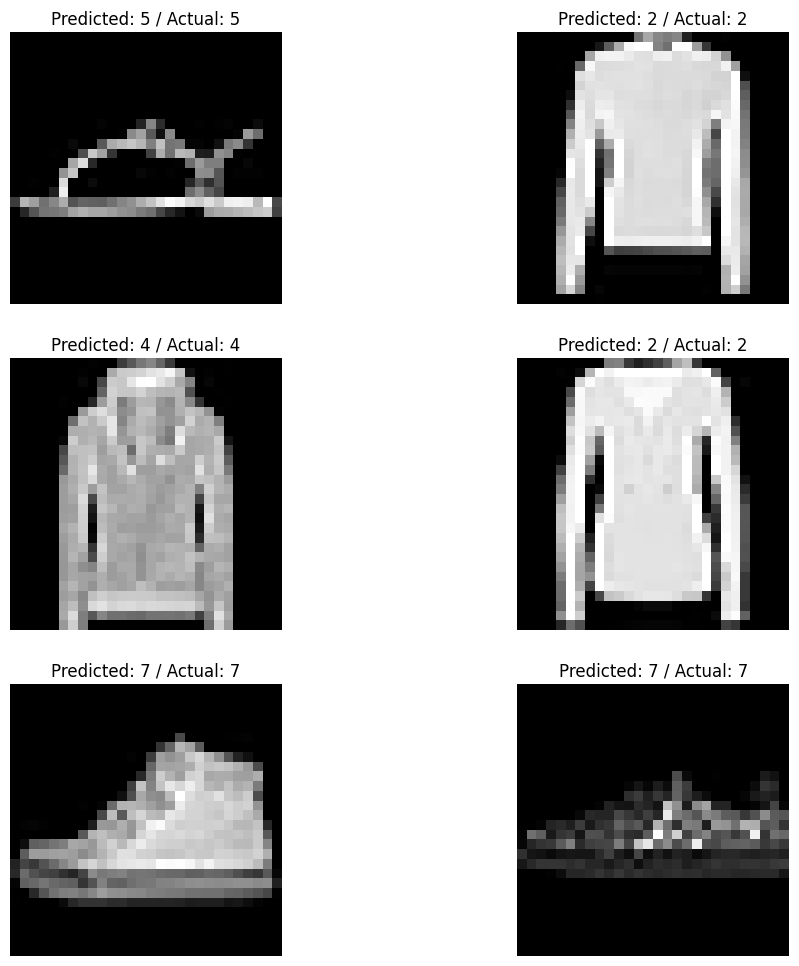

In [35]:
visualize_model_predictions(model, val_loader, device, num_images=6)
